In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Dropout

import os
import warnings
from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')

In [5]:
train_data=pd.read_csv("dataset.csv")
train_data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [19]:
train_data.columns
# Assuming 'train_data' is your DataFrame
train_data = train_data.drop("date", axis=1)


In [30]:
#train_data = train_data.drop("time", axis=1)
train_data = train_data.drop("username", axis=1)

In [21]:
train_data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [45]:
train_data.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [22]:
train_data['activity'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='activity'>

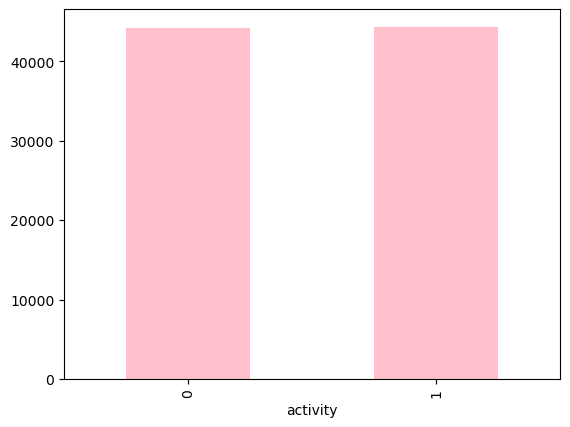

In [23]:
train_data['activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [46]:
# Drop the 'activity' column from the DataFrame
x_train = train_data.drop(columns=["activity"])

# Select the 'activity' column as the label (target)
y_train = train_data["activity"]

x_train.shape, y_train.shape
test_data=train_data

In [49]:
x_test = train_data.drop(columns=["activity"])

# Select the 'activity' column as the label (target)
y_test = train_data["activity"]
x_test.shape, y_test.shape

((88588, 7), (88588,))

In [48]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((88588, 6), (88588,), (88588, 6), (88588,))

In [50]:
scaling_data = MinMaxScaler()
# Ensure x_train and x_test have the same features
x_test = x_test[x_train.columns]
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [51]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs= 10,validation_data = (x_test,y_test))

Epoch 1/10
1385/1385 [==============================] - 4s 2ms/step - loss: 0.7036 - accuracy: 0.5651 - val_loss: 0.6232 - val_accuracy: 0.6845
Epoch 2/10
1385/1385 [==============================] - 3s 2ms/step - loss: 0.5453 - accuracy: 0.7294 - val_loss: 0.4280 - val_accuracy: 0.8478
Epoch 3/10
1385/1385 [==============================] - 3s 2ms/step - loss: 0.4374 - accuracy: 0.7938 - val_loss: 0.3679 - val_accuracy: 0.8577
Epoch 4/10
1385/1385 [==============================] - 4s 3ms/step - loss: 0.4006 - accuracy: 0.8124 - val_loss: 0.3472 - val_accuracy: 0.8634
Epoch 5/10
1385/1385 [==============================] - 3s 2ms/step - loss: 0.3832 - accuracy: 0.8206 - val_loss: 0.3377 - val_accuracy: 0.8652
Epoch 6/10
1385/1385 [==============================] - 3s 2ms/step - loss: 0.3725 - accuracy: 0.8263 - val_loss: 0.3324 - val_accuracy: 0.8618
Epoch 7/10
1385/1385 [==============================] - 3s 2ms/step - loss: 0.3678 - accuracy: 0.8277 - val_loss: 0.3295 - val_accuracy:

In [ ]:

# y_pred = model.predict(x_test)

# # Since we are using sigmoid activation for binary classification, the output will be a probability
# # We can threshold the probabilities to make a final classification (0 or 1)
# y_pred_class = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class (0 or 1)

# # Output predicted results
# print("Predictions (Raw probabilities):", y_pred)
# print("Predicted Class (0 or 1):", y_pred_class)

# # To evaluate the model's performance on the test dat
y=np.array([[0,1,26,1340,21,61,31.45]])
y_pred = model.predict(y)
categories=["walking","running"]
print(categories[(np.argmax(y_pred))])

1/1 [==============================] - 0s 19ms/step
walking


In [70]:
model.save('model.h5')


In [69]:
new_model = keras.models.load_model('model.keras')